# JS11 - PRAKTIKUM 2

#### Step 1 - Non Linear Data Ilustration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

Create Plotting Function

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Create Non Linear Dummy Data

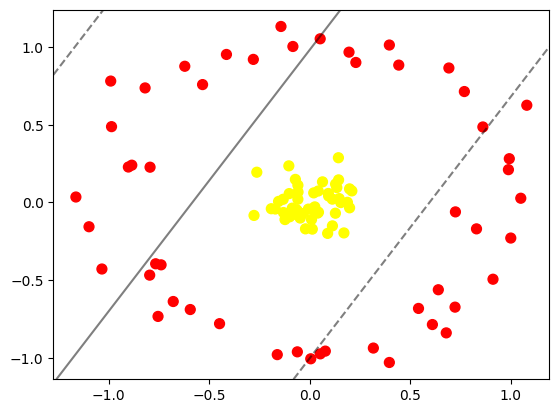

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X ** 2).sum(1)) # Calculate r as a radial basis function (e.g., Gaussian)
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.78585628,  1.96688602],
       [ 1.1372926 ,  0.54740762],
       [-0.02596621,  4.92577961],
       [ 0.26604148,  2.71915015],
       [ 3.00569136,  1.15121775],
       [ 1.34880003,  3.07479238],
       [ 1.01287689,  4.15404025],
       [ 3.59362114,  2.08207549],
       [ 0.66640862,  4.06194513],
       [ 1.41253979,  0.34602384],
       [ 0.69794036,  4.4288665 ],
       [ 1.75992205,  0.70616032],
       [ 1.14289006,  5.08509856],
       [ 0.25043139,  4.34534364],
       [ 1.84086482,  1.53962878],
       [ 3.96178334,  1.65324725],
       [ 2.95657626,  0.03371845],
       [ 0.43830172,  4.0161448 ],
       [ 1.00254159,  0.52839598],
       [ 1.43933466,  1.32906301],
       [ 1.10022802,  4.60631734],
       [ 0.72702805,  4.3487196 ],
       [ 1.46361712,  2.13207534],
       [ 0.04415021,  5.02444852],
       [ 2.47388885,  0.76042659],
       [ 0.893695  ,  4.63226613],
       [ 1.45946366,  0.23651283],
       [ 0.9846701 ,  5.73248372],
       [ 1.33136066,  4.57072679],
       [ 2.29385806,  1.95877238],
       [ 2.35640795,  0.01814303],
       [ 1.02948386,  4.54576485],
       [ 1.17176085,  0.93939572],
       [ 2.37207289,  0.02321445],
       [ 1.70714468,  2.37707464],
       [ 1.91929374,  4.15984746],
       [ 1.51580139,  0.92312811],
       [ 2.00067424,  2.26833784],
       [ 1.88779063,  3.31592667],
       [ 0.86226145,  1.24917702],
       [ 0.13742771,  3.16777298],
       [ 2.20249345,  5.47927434],
       [-0.38874607,  5.86440764],
       [ 1.29814339,  3.75593925],
       [ 1.1167688 ,  2.45256061],
       [ 2.18860632,  1.40568881],
       [ 2.02384127, -0.03681114],
       [ 1.77207239, -0.20229737],
       [-0.3278886 ,  4.67401313],
       [ 0.65372852,  5.28174338],
       [ 1.9765055 ,  0.36688103],
       [ 1.02098199,  1.11130436],
       [ 2.16687183,  5.82049867],
       [ 1.2613632 ,  4.86904586],
       [ 2.79207378,  3.14029479],
       [ 1.07779975,  4.62537882],
       [ 2.48279064,  3.22558008],
       [ 1.69084152,  0.91164699],
       [ 2.79195458,  1.15264578],
       [ 2.55545268, -0.38398246],
       [ 1.54659066,  1.4388103 ],
       [ 1.73634081,  4.18270156],
       [ 0.11966798,  5.14734871],
       [ 2.59310333,  1.22363313],
       [ 1.09150494,  5.46720613],
       [ 1.65684156,  2.4412893 ],
       [ 0.27963236,  3.8407076 ],
       [ 2.47031647,  3.52196502],
       [ 2.9349952 ,  1.42187464],
       [ 1.66781904,  3.71005531],
       [ 1.22672424,  3.62051074],
       [ 1.72437234,  0.29969981],
       [ 3.54931469,  1.62249939],
       [ 1.55954253,  4.40697366],
       [ 0.32575305,  2.92276125],
       [ 0.4688124 ,  4.01359439],
       [ 1.22787325,  1.44293927],
       [ 2.54653102,  1.635429  ],
       [ 0.56854833,  3.95332789],
       [ 0.9537243 ,  4.64645282],
       [ 1.36628697,  2.42571562],
       [ 1.11821099,  3.98236258],
       [-0.04011792,  5.07930469],
       [ 1.58510026,  4.40112734],
       [ 0.56762597,  3.35928158],
       [ 0.25989683,  4.61330933],
       [ 2.8130691 ,  0.77365559],
       [ 1.96050262,  5.26569121],
       [ 1.49961323,  0.77795603],
       [ 2.51654017,  0.73102466],
       [ 2.67269996,  1.55646698],
       [ 2.74073201,  0.37684319],
       [ 1.32500974,  1.79127669],
       [ 1.25509524, -0.33815322],
       [ 2.17153334,  4.13966072],
       [-1.06612177,  4.8266822 ],
       [ 1.5403728 , -0.88105886],
       [ 2.81480417,  0.96770465],
       [-0.3148482 ,  4.1335951 ],
       [ 1.07491911,  1.57315404]]), y=array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]))>

## Step 2 - Model Fitting

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

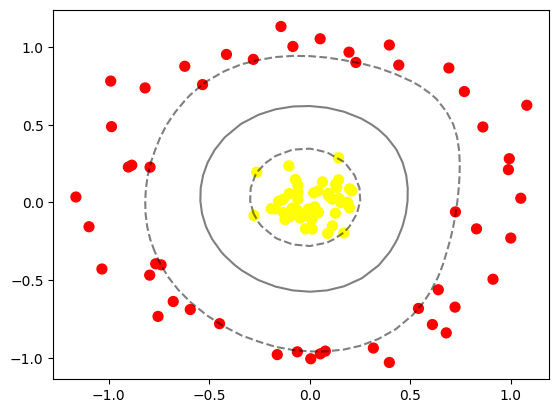

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')